# Сборный проект

### Задачи исследования

Изучить рынок российского кинопроката и выявить текущие тренды. 

Анализ фильмов, которые получили государственную поддержку. Насколько такие фильмы интересны зрителю?




### Расшифровка столбцов

<b>mkrf_movies</b>

    title — название фильма;

    puNumber — номер прокатного удостоверения;

    show_start_date — дата премьеры фильма;

    type — тип фильма;

    film_studio — студия-производитель;

    production_country — страна-производитель;

    director — режиссёр;

    producer — продюсер;

    age_restriction — возрастная категория;

    refundable_support — объём возвратных средств государственной поддержки;

    nonrefundable_support — объём невозвратных средств государственной поддержки;

    financing_source — источник государственного финансирования;

    budget — общий бюджет фильма;

    ratings — рейтинг фильма на КиноПоиске;

    genres — жанр фильма.


<b>mkrf_shows</b>

    puNumber — номер прокатного удостоверения;

    box_office — сборы в рублях.

In [2]:
#Импорт библиотек
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Настройки 
pd.set_option('display.max_columns', 60)

In [3]:
# Чтение данных

try:
    data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    data_movies = pd.read_csv('D:\Temp\Ya_Pr\mkrf_movies.csv')


try:
    data_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    data_shows = pd.read_csv('D:\Temp\Ya_Pr\mkrf_shows.csv')

In [4]:
# Функция для первого взгляда на датафрейм

def first_look(data_frame):
    display(data_frame.head(20))
    display(data_frame.info())
    display(data_frame.describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99]))
    display(f'Явных дубликатов обнаружено: {data_frame.duplicated().sum()}')



In [5]:
first_look(data_movies)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

,refundable_support,nonrefundable_support,budget
count,3.320000e+02,3.320000e+02,3.320000e+02
mean,1.186446e+07,4.898099e+07,1.272297e+08
std,2.491656e+07,5.998012e+07,1.885883e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
5%,0.000000e+00,6.000000e+06,7.954355e+06
25%,0.000000e+00,2.500000e+07,4.200000e+07
50%,0.000000e+00,3.000000e+07,6.864992e+07
75%,1.500000e+07,4.037500e+07,1.419853e+08
95%,6.000000e+07,1.612500e+08,4.129914e+08
99%,1.100000e+08,3.635521e+08,8.931420e+08


'Явных дубликатов обнаружено: 0'

In [6]:
first_look(data_shows)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

,puNumber,box_office
count,3.158000e+03,3.158000e+03
mean,1.201875e+08,7.647870e+07
std,1.238394e+07,2.403531e+08
min,1.110001e+08,0.000000e+00
5%,1.110035e+08,5.200000e+02
25%,1.130002e+08,8.623900e+04
50%,1.210131e+08,2.327988e+06
75%,1.210283e+08,2.397967e+07
95%,1.260022e+08,4.742796e+08
99%,2.170202e+08,1.282479e+09


'Явных дубликатов обнаружено: 0'

In [7]:
data_movies['puNumber'].duplicated().sum()

2

In [8]:
data_movies['puNumber'] = pd.to_numeric(data_movies['puNumber'], errors='coerce').fillna(0).astype('Int64')

In [9]:
data = data_movies.merge(data_shows, on='puNumber', how='left')

# забакапим
data_backup = data

first_look(data)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

None

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5%,1.110040e+08,0.000000e+00,6.000000e+06,7.954355e+06,5.200000e+02
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
95%,2.211027e+08,6.000000e+07,1.612500e+08,4.129914e+08,4.742796e+08
99%,2.240042e+08,1.100000e+08,3.635521e+08,8.931420e+08,1.282479e+09


'Явных дубликатов обнаружено: 0'

Замеченные проблемы:

* названия содержат точки, примечания (/по мотивам.../);
* дата в нечитаемом виде;
* разнобой в оформлении страны (запятые, дефисы);
* режиссеры, продюсеры тоже оформлены по-разному (с сокращением имени или без него);
* категория излишне многословна - достаточно цифры;
* множество пропусков в столбцах, касаемых финансов.

## Предобработка данных

In [10]:
data.duplicated().sum()

0

In [11]:
# Стоблец tittle

list(data['title'].unique())

['Открытый простор',
 'Особо важное задание',
 'Особо опасен',
 'Остановился поезд',
 'Любовь и голуби',
 'Любовь и сигареты',
 'Отпетые мошенники.',
 'Отпуск за свой счет',
 'Превосходство Борна /По одноименной новелле Роберта Ладлэма/',
 'Ответный ход',
 'Малышка на миллион /По мотивам рассказов Ф.Х.Тула из сборника "Клейма от канатов"/',
 'Преданный садовник',
 'Отель /По мотивам пьесы Джона Уэбстера/',
 'Председатель',
 'Осенний марафон',
 'Осень',
 'Неподдающиеся',
 'Неподсуден',
 'Незабываемый 1919-й год',
 'Незаконченная жизнь',
 'Операция "Ы" и другие приключения Шурика',
 'Неизвестные страницы из жизни разведчика',
 'Неисправимый лгун',
 'Призрак замка Моррисвиль',
 'Оружейный барон',
 'Отставной козы барабанщик',
 'Паршивая овца',
 'Плюмбум, или Опасная игра',
 'Первое свидание',
 'Охота на лис.',
 'Пиноккио 3000',
 'Перелом',
 'Мисс Поттер',
 'Миссис Хендерсон представляет',
 'Планета КА-ПЭКС /По мотивам романа Джин Бруэр/',
 'Молчи в тряпочку',
 'Мужики!..',
 'Автомобиль, с

In [12]:
def strip_title(x):
    t = x.split('/', maxsplit=1)
    t = x.split(' (', maxsplit=1)
    t = str(t[0])

    if t[-1] in ['_', '.', ',', '-']:
        t = t[:-1]
    
    x = t.strip().replace('ё', 'е').lower()
    
    return x

data['title'] = data['title'].apply(strip_title)

data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,отпетые мошенники,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [13]:
# Прокатное удостоверение
data = data.rename(columns={'puNumber': 'pu_number'})

In [14]:
# Дата старта проката

data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.round('1d')


In [15]:
# Колонка жанра

data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [16]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [17]:
# Уберем лишние пробелы в начеле жанров "Художественный" и "Анимационный"
#data.loc[data['type'] == ' Художественный', 'type'] = 'Художественный'
#data.loc[data['type'] == ' Анимационный', 'type'] = 'Анимационный'
#data['type'].unique()

In [18]:
# Колонка студий 
list(data['film_studio'].unique())

['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
 'Киностудия "Мосфильм"',
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
 'Юнайтед Артистс, Грин Стрит Филмз, Айкон Интертейнмент Интернэшнл',
 'Пульсар Продюксьон, ТФ1 Фильм ',
 'Киностудия "Мосфильм", Телевидение ВНР',
 'Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гипнотик, Калима Продакшнз, Лудлум Интертейнмент',
 'Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо Продакшнз, Альберт С.Рудди Продакшнз',
 'Потбойлер Продакшнз, Эпсилон Моушн Пикчерз, Скайон Филмз Лимитед, ЮК Филм Каунсил',
 'Кэтлей, Отель Продакшнс, Мунстоун Интертейнмент, Рэд Маллет Продакшнс',
 'Инишиэл Интертейнмент Групп, Мирамакс Филмз, Персистент Интертейнмент, Революшн Студиос, Зе Лэдд Компани',
 'Фильмове Студио Баррандов',
 'Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатурн Филмз, Райзинг Стар, Эндгейм Интертейнмент, Интертейнмент Мэньюфэкчуринг Компани, Р

In [19]:
# Уберем ООО, кавычки, снизим регистр

data['film_studio'] = data['film_studio'].str.replace('"', '').str.replace('ООО ', '').str.lower()

In [20]:
# Страна производства

data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [21]:
# Тоже неряшливое оформление. Заменим дефисы на запятые, снизим регистр

data['production_country'] = data['production_country'].str.replace(' - ', ', ').str.replace('-', ', ').str.lower()

In [22]:
# И пропуски
data['production_country'].isna().sum()

2

In [23]:
data.loc[data['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"детский юмористический киножурнал ""ералаш. ну ...",111001216,2016-02-09,Художественный,продюсерский центр ералаш,NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,мульт личности. выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [24]:
# Режиссер

print(f"Уникальных значений: {len(data['director'].str.lower().unique())}")
print()
print('Список уникальных значений:')
print(data['director'].str.lower().unique())

Уникальных значений: 4807

Список уникальных значений:
['кевин костнер' 'е.матвеев' 'тимур бекмамбетов' ... 'ник пауэлл'
 'а.беляев' 'и.трусов']


In [25]:
# А есть ли фильмы без режиссеров и продюсеров?
print(f'Количестов фильмов без режиссера: {len(data.loc[data["director"].isna()])}')
print(f'Количестов фильмов без продюсера: {len(data.loc[data["producer"].isna()])}')


Количестов фильмов без режиссера: 9
Количестов фильмов без продюсера: 568


In [26]:
# Есть, и немало :(
data['producer'].fillna('Неизвестен', inplace=True) 

data['director'].fillna('Неизвестен', inplace=True) 


In [27]:
# Функции для сокращения имен до инициалов

def remove_name(x):
    x = x.strip()
    x = re.sub('\.?\s(?:Хореография|Постановка)\s+\w+\s\w+\,?\.?\s?', '', x)
    
    x = x.replace('  ', ' ').replace(' и др.', '')
    x = re.sub('(?:\s\((\w+\.?\s?)+\))', '', x)
    temp = x.split(' ')
    
    if len(temp) > 1:
        for counter in range(len(temp) - 1):
            temp[counter] = str(temp[counter][0]) + '.'
    x = ''.join(temp).strip().replace('ё', 'е').lower()

    #print(x)

    return x

    
def name_family(x):
    x = x.strip()
    names = x.split(', ')
    
    short_name = ''
    for i in names:
        #print(i)
        i = remove_name(i)
        short_name = short_name + i + ', '
    
    x = short_name[:-2].strip()
    #print(x)
    
    return x


remove_name("М.Бальчюнас (псевдоним М.Вайсберг)")



'м.бальчюнас'

In [28]:
data['director'] = data['director'].apply(name_family)
data['producer'] = data['producer'].apply(name_family)

#data.head(20)


In [29]:
data['director'].unique()

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

In [ ]:

# Возрастная категория - уже привычный бардак :)
def age_replace(x):
    restriction = re.findall(r'(\d+)', x)
    return int(''.join(restriction[0]))

#age_replace('««16+» - для детей старше 16 лет')
data['age_restriction'] = data['age_restriction'].apply(age_replace)


#data['age_restriction'].unique()


C:\Users\apple\AppData\Local\Temp\ipykernel_2660\1499172870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_restriction'] = data['age_restriction'].apply(age_replace)


In [ ]:
data.head()

,title,pu_number,show_start_year,type,film_studio,production_country,main_director,main_producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,main_genre,box_office_mln,support_ratio
7456,холоп,111021719,2019,Художественный,мем-медиа по заказу ао вбд груп,россия,к.шипенко,э.илоян,12,25.0,35.0,160.00,Фонд кино,6.8,комедия,3073.57,0.375000
5653,движение вверх,111011817,2017,Художественный,студия тритэ никиты михалкова,россия,а.мегердичев,л.верещагин,6,0.0,400.0,590.19,Фонд кино,7.5,спорт,2779.69,0.677748
6820,мстители: финал,121005519,2019,Художественный,марвел студиос,сша,д.руссо,к.фейги,16,0.0,0.0,NaN,Отсутствует,7.6,фантастика,2576.61,NaN
6549,т-34,111024918,2018,Художественный,"кинокомпания марс-фильм по заказу мме, амедиа ...",россия,а.сидоров,а.златопольский,12,60.0,120.0,563.78,Фонд кино,6.5,драма,2271.75,0.319273
3488,пираты карибского моря: мертвецы не рассказыва...,121009217,2017,Художественный,"джерри брукхаймер филмз, уолт дисней пикчерз, ...",сша,й.реннинг,д.брукхаймер,16,0.0,0.0,NaN,Отсутствует,6.6,фэнтези,2118.40,NaN


In [ ]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [ ]:
# Финансовые показатели

print(f'Пропусков в столбце "refundable_support": {data["refundable_support"].isna().sum()}')
print()

print(f'Пропусков в столбце "nonrefundable_support": {data["nonrefundable_support"].isna().sum()}')
print()

print(f'Пропусков в столбце "budget": {data["budget"].isna().sum()}')
print()

print(f'Пропусков в столбце "financing_source": {data["financing_source"].isna().sum()}')
print()

Пропусков в столбце "refundable_support": 7154

Пропусков в столбце "nonrefundable_support": 7154

Пропусков в столбце "budget": 7154

Пропусков в столбце "financing_source": 7154



Положим, что пропуски в столбцах о поддержке (refundable_support, nonrefundable_support) означают, что поддержки не было, значит, можно заменить на нули.

Столбец financing_source заполним значениями "Отсутствует" там, где поддержка равна нулю. Если поддержка какая-либо есть, то заполним как "Неизвестен"

In [ ]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [ ]:
data['refundable_support'] = data['refundable_support'].fillna(0)

data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)


In [ ]:

data.loc[((data['refundable_support'] == 0) & (data['nonrefundable_support'] == 0)), 'financing_source'] = data.loc[((data['refundable_support'] == 0) & (data['nonrefundable_support'] == 0)), 'financing_source'].fillna(value='Отсутствует')


data.loc[((data['financing_source'].isna()) & ((data['refundable_support'] != 0) | (data['nonrefundable_support'] != 0))), 'financing_source'] = data.loc[((data['financing_source'].isna()) & ((data['refundable_support'] != 0) | (data['nonrefundable_support'] != 0))), 'financing_source'].fillna('Неизвестен')

print(f"Пропусков в столбце financing_source: {data.loc[data['financing_source'].isna(), 'financing_source'].sum()}")

Пропусков в столбце financing_source: 0


In [ ]:
data['financing_source'].unique()

array(['Отсутствует', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [ ]:
# Рейтинг
print(f"Пропусков в столбце 'Рейтинг': {data['ratings'].isna().sum()}")

data['ratings'].unique()

Пропусков в столбце 'Рейтинг': 967


array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [ ]:
data['ratings'] = data['ratings'].str.replace('%', '')

data['ratings'] = data['ratings'].astype(float)

data.loc[data['ratings'] > 10, 'ratings'] = (data.loc[data['ratings'] > 10, 'ratings'] / 10)


Пропусков в столбце рейтингов: 967, от общего количества: 0.12917445899011487


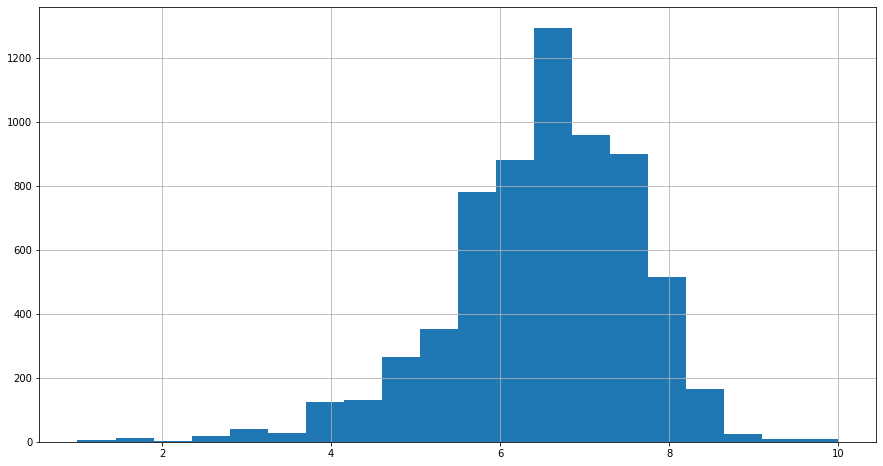

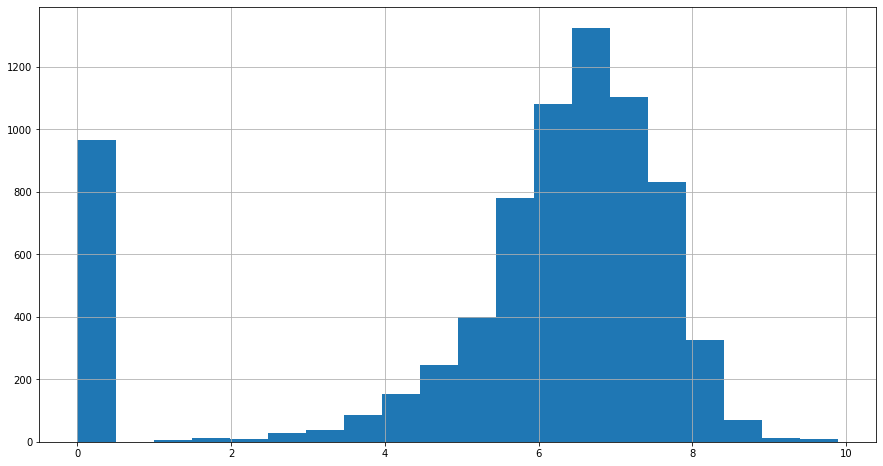

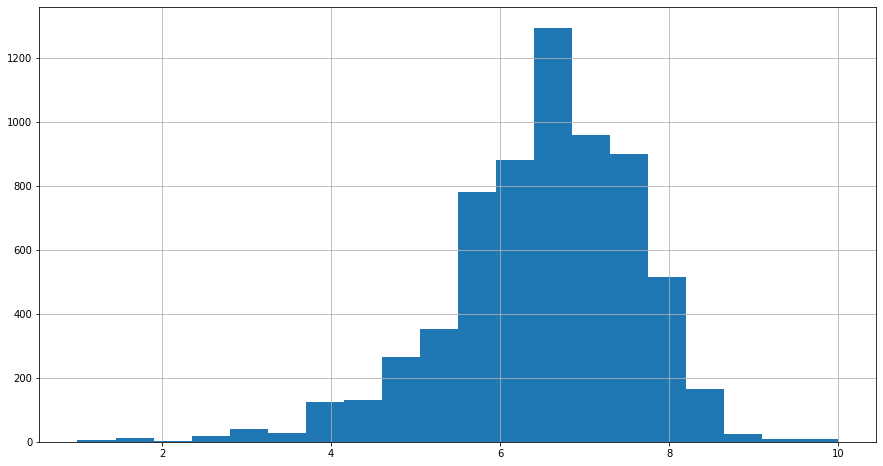

In [ ]:

print(f"Пропусков в столбце рейтингов: {data['ratings'].isna().sum()}, от общего количества: {data['ratings'].isna().sum()/len(data)}")


data['ratings'].hist(bins=20, figsize=(15, 8), range=(1, 10))

plt.show()

# Заменим пропуски на 0 - условное значение, обозначающее отсутствие рейтинга

data['ratings'].fillna(0, inplace=True)








#for every in data['age_restriction'].unique():
#    data.loc[(data['age_restriction'] == every) & (data['ratings'].isna()), 'ratings'] =  data.loc[data['age_restriction'] == every, 'ratings'].median()

data['ratings'].hist(bins=20, figsize=(15, 8))

plt.show()

data['ratings'].hist(bins=20, figsize=(15, 8), range=(1, 10))
plt.show()


In [ ]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27,Художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,к.костнер,"д.валдес, к.костнер, д.эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,7.2,"боевик,драма,мелодрама",NaN
1,особо важное задание,111013716,2016-09-14,Художественный,киностудия мосфильм,ссср,е.матвеев,неизвестен,«6+» - для детей старше 6 лет,0.0,0.0,NaN,Отсутствует,6.6,"драма,военный",NaN
2,особо опасен,221038416,2016-10-10,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,т.бекмамбетов,"д.лемли, д.нетер, м.е.платт, я.смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916,2016-06-10,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,т.бекмамбетов,"д.лемли, д.нетер, м.е.платт, я.смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815,2015-07-30,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,т.бекмамбетов,"д.лемли, д.нетер, м.е.платт, я.смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN


In [ ]:
# Жанры

data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [ ]:
print(f"Пропусков в столбце 'Жанр': {data['genres'].isna().sum()}")

Пропусков в столбце 'Жанр': 976


In [ ]:
data['genres'].fillna('неизвестен', inplace=True)

In [ ]:
# Сборы

data['box_office'].describe()


count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

In [ ]:
# Слишком большие циферки. Переведем в миллионы

data['refundable_support_mln'] = (data['refundable_support'] / 1000000).round(decimals=2)
data['nonrefundable_support_mln'] = (data['nonrefundable_support'] / 1000000).round(decimals=2)
data['budget_mln'] = (data['budget'] / 1000000).round(decimals=2)
data['box_office_mln'] = (data['box_office'] / 1000000).round(decimals=2)

In [ ]:
print(f"Одинаковых прокатных удостоверений: {data['pu_number'].duplicated().sum()}")

data = data.sort_values(by='box_office_mln', ascending=False).drop_duplicates(subset='pu_number', keep='first')

Одинаковых прокатных удостоверений: 2


In [ ]:
# И дубликаты. 
data = data.sort_values(by='box_office_mln', ascending=False).drop_duplicates(subset='title', keep='first')

Добавьте новые столбцы:
  
Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма;


Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;


Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [ ]:
data['show_start_year'] = data['show_start_date'].dt.year

In [ ]:
def single_value(x):
    x = x.split(',', maxsplit=1)
    return x[0]


data['main_director'] = data['director'].apply(single_value)
data['main_genre'] = data['genres'].apply(single_value)
data['main_producer'] = data['producer'].apply(single_value)
data['support_ratio'] = (data['refundable_support_mln'] + data['nonrefundable_support_mln']) / data['budget_mln']

In [ ]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,refundable_support_mln,nonrefundable_support_mln,budget_mln,box_office_mln,show_start_year,main_director,main_genre,main_producer,support_ratio
7456,холоп,111021719,2019-12-20,Художественный,мем-медиа по заказу ао вбд груп,россия,к.шипенко,"э.илоян, д.жалинский, в.дусмухаметов, т.бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09,25.0,35.0,160.00,3073.57,2019,к.шипенко,комедия,э.илоян,0.375000
5653,движение вверх,111011817,2017-12-22,Художественный,студия тритэ никиты михалкова,россия,а.мегердичев,"л.верещагин, а.златопольский, н.михалков, о.""....",«6+» - для детей старше 6 лет,0.0,400000000.0,590192191.0,Фонд кино,7.5,"спорт,драма",2.779686e+09,0.0,400.0,590.19,2779.69,2017,а.мегердичев,спорт,л.верещагин,0.677748
6820,мстители: финал,121005519,2019-04-30,Художественный,марвел студиос,сша,"д.руссо, э.руссо",к.фейги,«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.6,"фантастика,боевик,драма",2.576614e+09,0.0,0.0,NaN,2576.61,2019,д.руссо,фантастика,к.фейги,NaN
6549,т-34,111024918,2018-12-21,Художественный,"кинокомпания марс-фильм по заказу мме, амедиа ...",россия,а.сидоров,"а.златопольский, р.дишдишян, л.блаватник, н.п....",«12+» - для детей старше 12 лет,60000000.0,120000000.0,563784717.0,Фонд кино,6.5,"драма,военный,боевик",2.271754e+09,60.0,120.0,563.78,2271.75,2018,а.сидоров,драма,а.златопольский,0.319273
3488,пираты карибского моря: мертвецы не рассказыва...,121009217,2017-05-18,Художественный,"джерри брукхаймер филмз, уолт дисней пикчерз, ...",сша,"й.реннинг, э.сандберг",д.брукхаймер,«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,6.6,"фэнтези,боевик,комедия",2.118396e+09,0.0,0.0,NaN,2118.40,2017,й.реннинг,фэнтези,д.брукхаймер,NaN


In [ ]:
data.query('title == "особо опасен"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,refundable_support_mln,nonrefundable_support_mln,budget_mln,box_office_mln,show_start_year,main_director,main_genre,main_producer,support_ratio
2,особо опасен,221038416,2016-10-10,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,т.бекмамбетов,"д.лемли, д.нетер, м.е.платт, я.смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN,0.0,0.0,NaN,NaN,2016,т.бекмамбетов,фантастика,д.лемли,NaN


In [ ]:
print(f'Данных уменьшилось на {round((1 - len(data)/len(data_backup)) * 100)}%')

Данных уменьшилось на 12%


In [ ]:
data_backup_pred = data

## Исследовательский анализ данных
Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.


Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?


С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. Сравните значения и сделайте выводы.
Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [ ]:
data = data[['title', 'pu_number', 'show_start_year', 'type', 'film_studio',
       'production_country', 'main_director', 'main_producer', 'age_restriction',
       'refundable_support_mln', 'nonrefundable_support_mln', 'budget_mln',
       'financing_source', 'ratings', 'main_genre', 'box_office_mln', 'support_ratio']]

In [ ]:
data.head()

,title,pu_number,show_start_year,type,film_studio,production_country,main_director,main_producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,main_genre,box_office_mln,support_ratio
7456,холоп,111021719,2019,Художественный,мем-медиа по заказу ао вбд груп,россия,к.шипенко,э.илоян,«12+» - для детей старше 12 лет,25.0,35.0,160.00,Фонд кино,6.8,комедия,3073.57,0.375000
5653,движение вверх,111011817,2017,Художественный,студия тритэ никиты михалкова,россия,а.мегердичев,л.верещагин,«6+» - для детей старше 6 лет,0.0,400.0,590.19,Фонд кино,7.5,спорт,2779.69,0.677748
6820,мстители: финал,121005519,2019,Художественный,марвел студиос,сша,д.руссо,к.фейги,«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.6,фантастика,2576.61,NaN
6549,т-34,111024918,2018,Художественный,"кинокомпания марс-фильм по заказу мме, амедиа ...",россия,а.сидоров,а.златопольский,«12+» - для детей старше 12 лет,60.0,120.0,563.78,Фонд кино,6.5,драма,2271.75,0.319273
3488,пираты карибского моря: мертвецы не рассказыва...,121009217,2017,Художественный,"джерри брукхаймер филмз, уолт дисней пикчерз, ...",сша,й.реннинг,д.брукхаймер,«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,6.6,фэнтези,2118.40,NaN


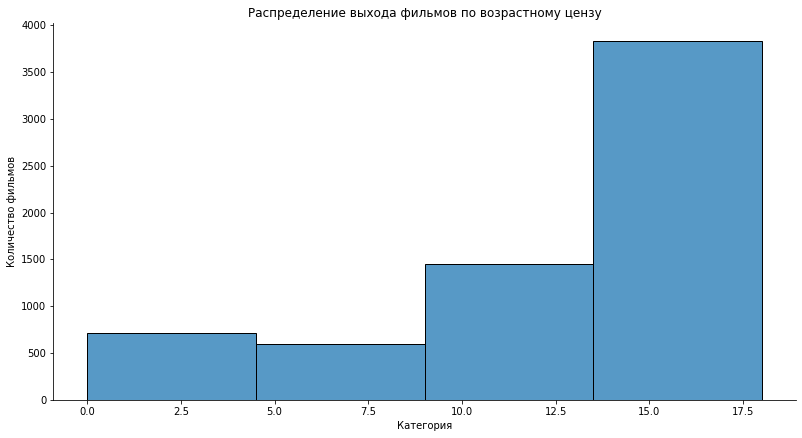

In [ ]:

sns.displot(data['age_restriction'], bins=4, height=6, aspect=15/8)

#plt.xticks(data.show_start_year.values)
plt.title('Распределение выхода фильмов по возрастному цензу')
plt.xlabel('Категория')
plt.ylabel('Количество фильмов')
plt.show()

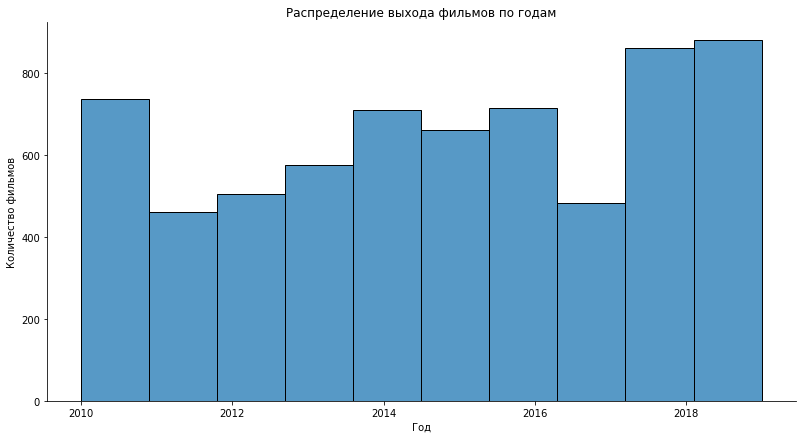

In [ ]:

sns.displot(data['show_start_year'], bins=10, height=6, aspect=15/8)

#plt.xticks(data.show_start_year.values)
plt.title('Распределение выхода фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()

Со временм количество фильмов увеличивается. В 2019 г. снято более 850 фильмов! А вот в 2017-м совсем неохотно поддерживали кино

In [ ]:
print(f'Доля фильмов с известными данными о прокате: {round(data["box_office_mln"].notna().sum() / len(data["box_office_mln"]), 2) * 100} %')

Доля фильмов с известными данными о прокате: 47.0 %


In [ ]:
box_office_data = (data
    .query('box_office_mln.notna()')
    .pivot_table(index='show_start_year', values='box_office_mln', aggfunc=['count', 'mean', 'median', 'min', 'max', 'sum']).reset_index()
)

box_office_data.columns = ['_'.join(col).rstrip('_') for col in box_office_data.columns.values]

def bo_ratio(row):
    return row['count_box_office_mln'] / len(data.query('show_start_year == @row.show_start_year'))


box_office_data['box_office_ratio'] = box_office_data.apply(bo_ratio, axis=1)

box_office_data


,show_start_year,count_box_office_mln,mean_box_office_mln,median_box_office_mln,min_box_office_mln,max_box_office_mln,sum_box_office_mln,box_office_ratio
0,2010,99,0.021313,0.000,0.00,1.45,2.11,0.134511
1,2011,100,0.139300,0.000,0.00,11.62,13.93,0.217391
2,2012,124,0.055000,0.010,0.00,2.31,6.82,0.245545
3,2013,179,0.165642,0.000,0.00,19.96,29.65,0.311304
4,2014,271,27.471624,0.020,0.00,1016.41,7444.81,0.381690
5,2015,458,84.794454,4.945,0.00,1658.86,38835.86,0.692890
6,2016,503,94.954831,4.630,0.00,2048.13,47762.28,0.704482
7,2017,353,137.526714,10.390,0.01,2779.69,48546.93,0.730849
8,2018,475,104.565032,8.890,0.04,2271.75,49668.39,0.552326
9,2019,526,92.058099,4.750,0.00,3073.57,48422.56,0.598407


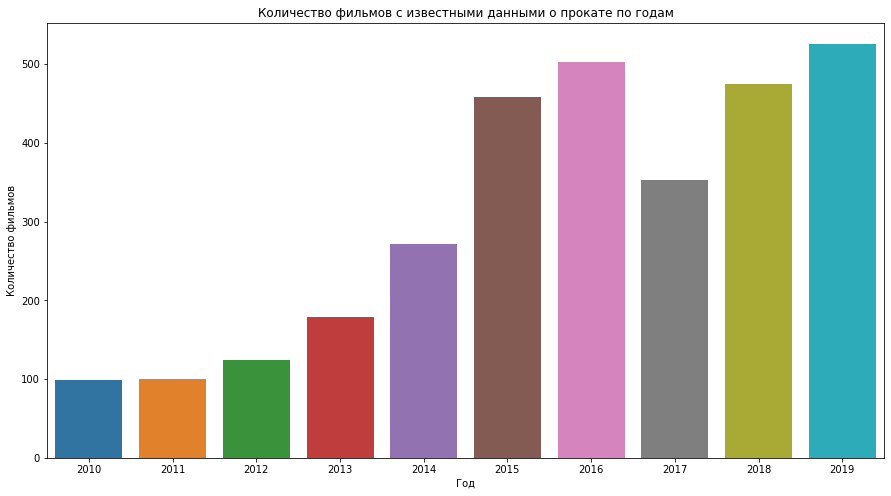

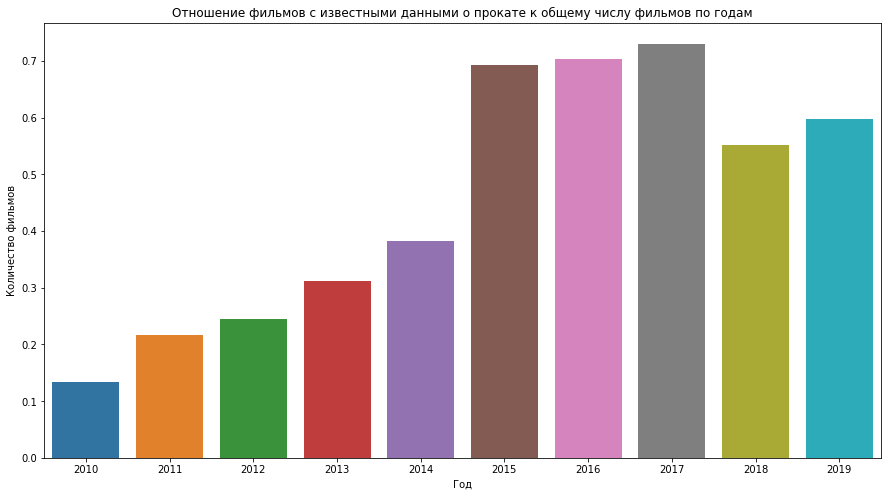

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(x=box_office_data['show_start_year'], y=box_office_data['count_box_office_mln'])

plt.title('Количество фильмов с известными данными о прокате по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()


plt.figure(figsize=(15,8))

sns.barplot(x=box_office_data['show_start_year'], y=box_office_data['box_office_ratio'])

plt.title('Отношение фильмов с известными данными о прокате к общему числу фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()




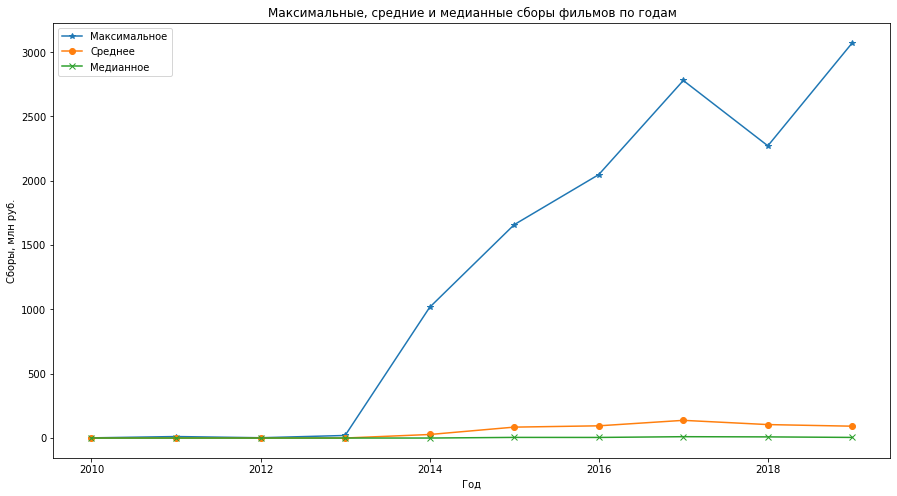

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(box_office_data['show_start_year'], box_office_data['max_box_office_mln'], marker ='*')

ax.plot(box_office_data['show_start_year'], box_office_data['mean_box_office_mln'], marker ='o')
ax.plot(box_office_data['show_start_year'], box_office_data['median_box_office_mln'], marker ='x')


plt.title('Максимальные, средние и медианные сборы фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Сборы, млн руб.')
plt.legend(['Максимальное', 'Среднее', 'Медианное', ], loc='upper left')

plt.show()

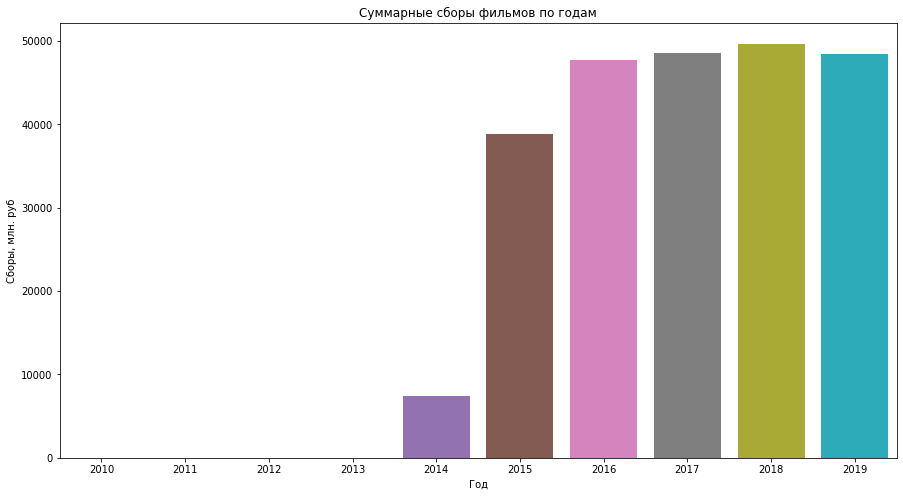

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(x=box_office_data['show_start_year'], y=box_office_data['sum_box_office_mln'])

plt.title('Суммарные сборы фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Сборы, млн. руб')
plt.show()

Как видно из графиков, количество снимаемого кино с годами увеличивается (за исключением 2017 г.). Также увеличивается и раскрытие данных о заработке картин.

С 2014 г. начинают выходить интересные зрителю фильмы, которые собирают хорошую кассу в прокате, и с годами сборы у самых удачных картин повышаются.

Средние сборы также повышаются с годами.

2017 г. представлен в данных полнее всех, так как отношение фильмов с известными данными по сборам к общему числу фильмов максимально

Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.


In [ ]:
box_office_by_age = data.query('show_start_year >= 2015').pivot_table(index='age_restriction', values='box_office_mln', columns='show_start_year', aggfunc='sum')#.reset_index()


In [ ]:
box_office_by_age

show_start_year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,379.05,150.00,229.60,32.45,17.75
«12+» - для детей старше 12 лет,12985.46,12120.90,7851.44,14267.31,12679.73
«16+» - для детей старше 16 лет,11366.14,16663.58,18740.75,16503.62,12751.82
«18+» - запрещено для детей,5403.44,6774.64,9638.99,8760.04,10121.65
«6+» - для детей старше 6 лет,8701.77,12053.16,12086.15,10104.97,12851.61


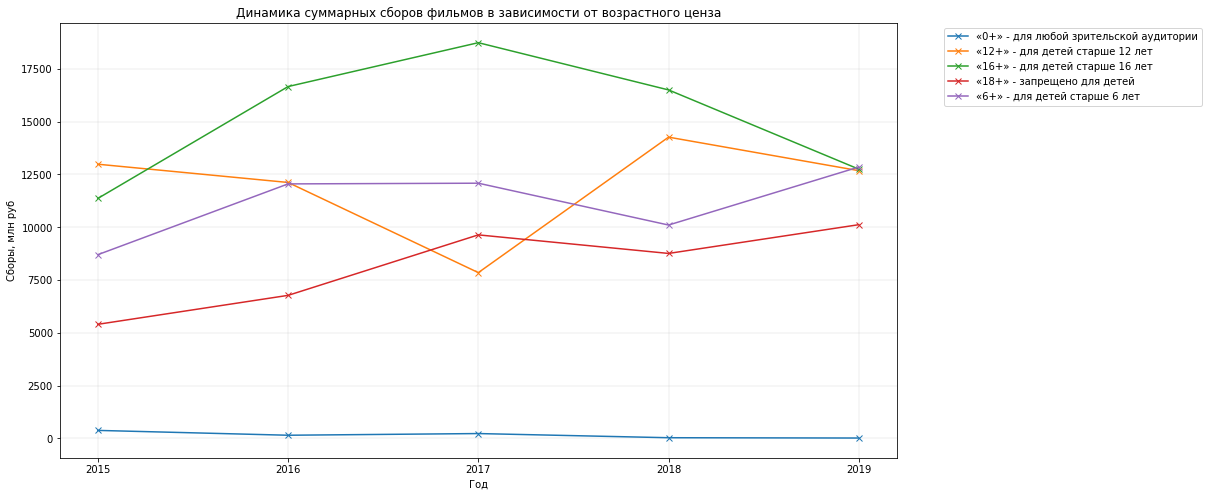

In [ ]:
# Порисуем графики функцией
def dinamic_per_year(data_frame, title):
    fig, ax = plt.subplots(figsize=(15, 8))

    [ax.plot(data_frame.columns, data_frame.loc[i], marker ='x', label=i) for i in data_frame.index]

    plt.xticks(data_frame.columns)

    plt.grid(linestyle='-', linewidth=0.2)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='best')

    plt.title(title)
    plt.xlabel('Год')
    plt.ylabel('Сборы, млн руб')

    plt.show()

dinamic_per_year(box_office_by_age, 'Динамика суммарных сборов фильмов в зависимости от возрастного ценза')
    

In [ ]:
box_office_per_type = data.query('show_start_year >= 2015').pivot_table(index='type', values='box_office_mln', columns='show_start_year', aggfunc='sum')

box_office_per_type

show_start_year,2015,2016,2017,2018,2019
type,,,,,
Анимационный,7638.39,9827.54,8351.29,6758.68,10267.89
Документальный,0.35,9.62,0.62,8.56,34.27
Музыкально-развлекательный,NaN,NaN,NaN,NaN,1.42
Научно-популярный,NaN,0.49,0.80,2.66,2.46
Прочие,39.87,43.21,32.38,42.61,110.20
Художественный,31157.25,37881.42,40161.84,42855.88,38006.32


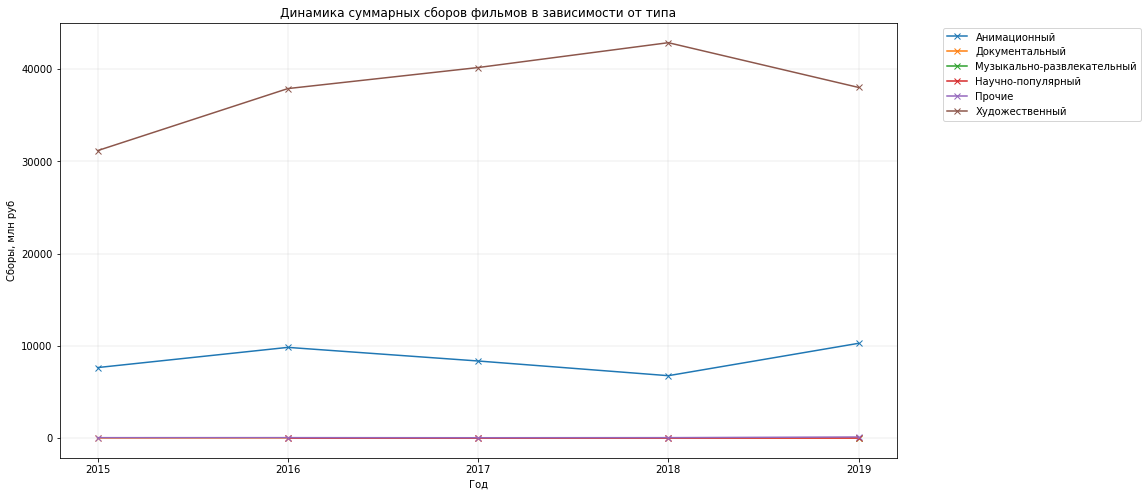

In [ ]:

dinamic_per_year(box_office_per_type, 'Динамика суммарных сборов фильмов в зависимости от типа')


In [ ]:
box_office_per_genre = data.query('show_start_year >= 2015 and box_office_mln > 1000').pivot_table(index='main_genre', values='box_office_mln', columns='show_start_year', fill_value=0, aggfunc='sum')

box_office_per_genre

show_start_year,2015,2016,2017,2018,2019
main_genre,,,,,
аниме,0.00,0.00,0.00,1125.24,0.00
биография,0.00,0.00,0.00,1019.19,0.00
боевик,1486.13,1021.43,1429.98,1913.26,1065.21
драма,0.00,1402.26,0.00,2271.75,1121.95
история,0.00,0.00,1229.59,0.00,0.00
комедия,0.00,0.00,1655.04,1682.68,4113.28
мультфильм,2646.74,4019.14,2767.12,0.00,4995.70
неизвестен,0.00,0.00,0.00,1445.73,0.00
приключения,1006.74,0.00,0.00,0.00,0.00


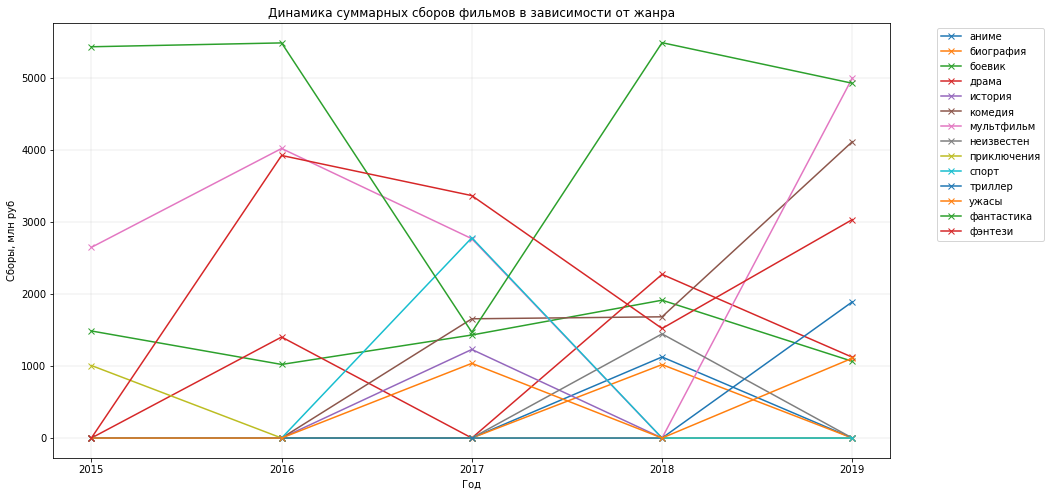

In [ ]:
dinamic_per_year(box_office_per_genre, 'Динамика суммарных сборов фильмов в зависимости от жанра')

# Ужасный график, конечно


Картины для самых юных зрителей не пользуются популярностью. Более того, в последние годы их сборы заметно упали (с 273 млн руб. в 2015 г. до 18 млн в 2019 г.). Вероятно, с развитием интернета (Ютуба в частности) малыши стали гораздо чаще смотреть мультики дома, чем в кинотеатрах.

Категория 6+ - уверенный середнячок, в общем и целом показывает рост со временем. Пиковые значения в 2017 и 2019 гг. обусловлены выходом ряда успешных проектов, в основном анимационных.

Категория 12+ также имеет средние показатели. Просадка в 2017 г. скорее всего связана с пиком соседней категории 16+ - там вышли более успешные картины (а-ля "Пираты Карибского моря" или "Стражи галактики").

Категория 16+ - лидер проката. Практически каждый год (кроме 2015) собирает больше других категорий. Причина - вероятнее всего в том, что под грифом 16+ выходят в прокат популярные франшизы (например, Марвел).

18+-фильмы гораздо менее популярны. Связано это с тем, что детей и подростков (которые составляют значительную долю зрителей) на них не пускают.

---

По типу фильма ожидаемо пользуются спросом художественные и анимационные, прочие типы практически равновесны и не имеют заметных сборов.



##  Исследуйте фильмы, которые получили государственную поддержку

In [ ]:
data_support = data.query('refundable_support_mln > 0 or nonrefundable_support_mln > 0').copy()

# Добавим колонки с полной поддержкой и доходностью
data_support['full_support_mln'] = data_support['refundable_support_mln'] + data_support['nonrefundable_support_mln']

data_support['income_mln'] = data_support['box_office_mln'] - data_support['budget_mln']


In [ ]:
first_look(data_support)

,title,pu_number,show_start_year,type,film_studio,production_country,main_director,main_producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,main_genre,box_office_mln,support_ratio,full_support_mln,income_mln
7456,холоп,111021719,2019,Художественный,мем-медиа по заказу ао вбд груп,россия,к.шипенко,э.илоян,«12+» - для детей старше 12 лет,25.0,35.0,160.00,Фонд кино,6.8,комедия,3073.57,0.375000,60.0,2913.57
5653,движение вверх,111011817,2017,Художественный,студия тритэ никиты михалкова,россия,а.мегердичев,л.верещагин,«6+» - для детей старше 6 лет,0.0,400.0,590.19,Фонд кино,7.5,спорт,2779.69,0.677748,400.0,2189.50
6549,т-34,111024918,2018,Художественный,"кинокомпания марс-фильм по заказу мме, амедиа ...",россия,а.сидоров,а.златопольский,«12+» - для детей старше 12 лет,60.0,120.0,563.78,Фонд кино,6.5,драма,2271.75,0.319273,180.0,1707.97
5505,последний богатырь,111007017,2017,Художественный,киностудия слово по заказу уолт дисней компани...,россия,д.дьяченко,э.илоян,«12+» - для детей старше 12 лет,50.0,50.0,352.48,Фонд кино,6.8,комедия,1655.04,0.283704,100.0,1302.56
5708,лед,111000518,2018,Художественный,"водород 2011, арт пикчерс студия, государствен...",россия,о.трофим,м.врубель,«12+» - для детей старше 12 лет,25.0,60.0,148.59,Фонд кино,0.0,неизвестен,1445.73,0.572044,85.0,1297.14
2920,экипаж,111005416,2016,Художественный,студия тритэ никиты михалкова,россия,н.лебедев,л.верещагин,«6+» - для детей старше 6 лет,50.0,392.1,635.28,Фонд кино,7.6,драма,1402.26,0.695914,442.1,766.98
3565,притяжение,111018116,2016,Художественный,"водород 2011, арт пикчерс студия",россия,ф.бондарчук,"о."".п.студия""",«12+» - для детей старше 12 лет,0.0,250.0,0.00,Фонд кино,5.6,фантастика,1038.32,inf,250.0,1038.32
5641,ёлки новые,111011617,2017,Художественный,таббак,россия,д.киселев,т.бекмамбетов,«6+» - для детей старше 6 лет,50.0,50.0,174.38,Фонд кино,5.8,комедия,855.45,0.573460,100.0,681.07
5826,тренер,111003218,2018,Художественный,"дк интертеймент, киностудия слово, студия трит...",россия,д.козловский,д.козловский,«12+» - для детей старше 12 лет,0.0,260.0,390.19,Фонд кино,6.8,драма,820.53,0.666342,260.0,430.34
5659,три богатыря и принцесса египта,114003317,2017,Анимационный,студия анимационного кино мельница,россия,к.феоктистов,с.сельянов,«6+» - для детей старше 6 лет,50.0,0.0,174.46,Фонд кино,5.5,мультфильм,759.23,0.286599,50.0,584.77


<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 7456 to 7478
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      327 non-null    object 
 1   pu_number                  327 non-null    Int64  
 2   show_start_year            327 non-null    int64  
 3   type                       327 non-null    object 
 4   film_studio                327 non-null    object 
 5   production_country         327 non-null    object 
 6   main_director              327 non-null    object 
 7   main_producer              327 non-null    object 
 8   age_restriction            327 non-null    object 
 9   refundable_support_mln     327 non-null    float64
 10  nonrefundable_support_mln  327 non-null    float64
 11  budget_mln                 327 non-null    float64
 12  financing_source           327 non-null    object 
 13  ratings                    327 non-null    flo

None

c:\Users\apple\anaconda3\envs\ds_practicum_env\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\apple\anaconda3\envs\ds_practicum_env\lib\site-packages\numpy\lib\function_base.py:3964: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5)


,pu_number,show_start_year,refundable_support_mln,nonrefundable_support_mln,budget_mln,ratings,box_office_mln,support_ratio,full_support_mln,income_mln
count,3.270000e+02,327.000000,327.000000,327.000000,327.000000,327.000000,315.000000,327.000000,327.000000,315.000000
mean,1.112878e+08,2016.718654,11.381193,48.196208,125.217064,5.711621,133.432952,inf,59.577401,5.640603
std,8.660908e+05,1.646819,23.996393,57.154079,184.293267,1.713583,336.254826,NaN,68.920548,320.392395
min,1.110001e+08,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044043,3.000000,-1971.470000
5%,1.110007e+08,2014.000000,0.000000,6.000000,4.338000,1.450000,0.060000,0.211277,20.000000,-216.676000
25%,1.110049e+08,2015.000000,0.000000,25.000000,42.000000,5.200000,1.265000,0.379808,25.320000,-70.060000
50%,1.110103e+08,2017.000000,0.000000,30.000000,68.810000,6.100000,16.080000,0.612714,35.000000,-40.040000
75%,1.110176e+08,2018.000000,15.000000,40.750000,140.015000,6.700000,107.355000,0.662164,60.000000,3.170000
95%,1.140027e+08,2019.000000,58.500000,150.000000,396.413000,7.670000,603.325000,NaN,200.000000,354.385000
99%,1.140059e+08,2019.000000,107.400000,300.000000,755.047600,8.422000,1625.736600,NaN,387.000000,1301.801200


'Явных дубликатов обнаружено: 0'

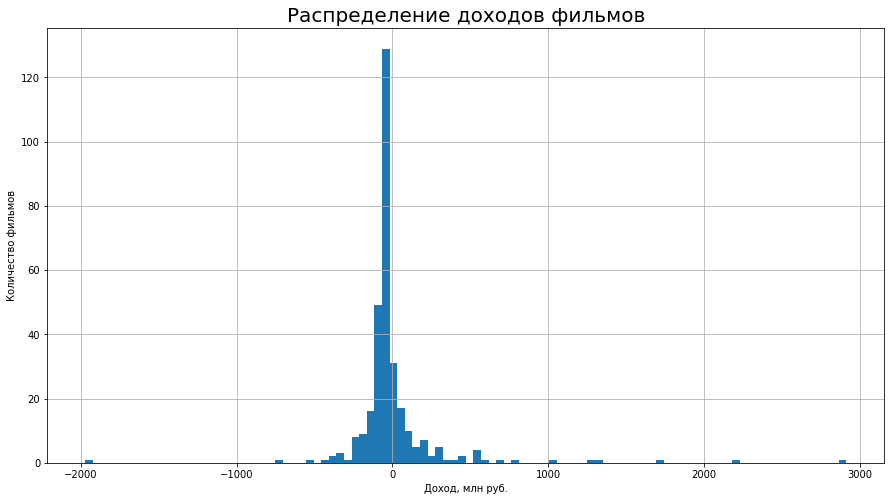

In [ ]:
data_support.income_mln.hist(bins=100, figsize=(15, 8))

plt.title('Распределение доходов фильмов', fontsize=20)
plt.xlabel('Доход, млн руб.')
plt.ylabel('Количество фильмов')

plt.show()

Из гистограммы видно, что большинство фильмов неммного не окупаются. Любопытны крайние значения - почти 2 млрд убытка и 3 млрд руб. прибыли

In [ ]:
data_support.query('(income_mln < -500) | (income_mln > 500)').sort_values(by='income_mln', ascending=False)

,title,pu_number,show_start_year,type,film_studio,production_country,main_director,main_producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,main_genre,box_office_mln,support_ratio,full_support_mln,income_mln
7456,холоп,111021719,2019,Художественный,мем-медиа по заказу ао вбд груп,россия,к.шипенко,э.илоян,«12+» - для детей старше 12 лет,25.0,35.0,160.00,Фонд кино,6.8,комедия,3073.57,0.375000,60.0,2913.57
5653,движение вверх,111011817,2017,Художественный,студия тритэ никиты михалкова,россия,а.мегердичев,л.верещагин,«6+» - для детей старше 6 лет,0.0,400.0,590.19,Фонд кино,7.5,спорт,2779.69,0.677748,400.0,2189.50
6549,т-34,111024918,2018,Художественный,"кинокомпания марс-фильм по заказу мме, амедиа ...",россия,а.сидоров,а.златопольский,«12+» - для детей старше 12 лет,60.0,120.0,563.78,Фонд кино,6.5,драма,2271.75,0.319273,180.0,1707.97
5505,последний богатырь,111007017,2017,Художественный,киностудия слово по заказу уолт дисней компани...,россия,д.дьяченко,э.илоян,«12+» - для детей старше 12 лет,50.0,50.0,352.48,Фонд кино,6.8,комедия,1655.04,0.283704,100.0,1302.56
5708,лед,111000518,2018,Художественный,"водород 2011, арт пикчерс студия, государствен...",россия,о.трофим,м.врубель,«12+» - для детей старше 12 лет,25.0,60.0,148.59,Фонд кино,0.0,неизвестен,1445.73,0.572044,85.0,1297.14
3565,притяжение,111018116,2016,Художественный,"водород 2011, арт пикчерс студия",россия,ф.бондарчук,"о."".п.студия""",«12+» - для детей старше 12 лет,0.0,250.0,0.00,Фонд кино,5.6,фантастика,1038.32,inf,250.0,1038.32
2920,экипаж,111005416,2016,Художественный,студия тритэ никиты михалкова,россия,н.лебедев,л.верещагин,«6+» - для детей старше 6 лет,50.0,392.1,635.28,Фонд кино,7.6,драма,1402.26,0.695914,442.1,766.98
5641,ёлки новые,111011617,2017,Художественный,таббак,россия,д.киселев,т.бекмамбетов,«6+» - для детей старше 6 лет,50.0,50.0,174.38,Фонд кино,5.8,комедия,855.45,0.573460,100.0,681.07
5659,три богатыря и принцесса египта,114003317,2017,Анимационный,студия анимационного кино мельница,россия,к.феоктистов,с.сельянов,«6+» - для детей старше 6 лет,50.0,0.0,174.46,Фонд кино,5.5,мультфильм,759.23,0.286599,50.0,584.77
2701,самый лучший день,111017815,2015,Художественный,таббак,россия,а.першин,т.бекмамбетов,«16+» - для детей старше 16 лет,29.0,34.0,130.62,Фонд кино,4.7,комедия,683.03,0.482315,63.0,552.41


Вот они, успехи и провалы российского кинематографа :)

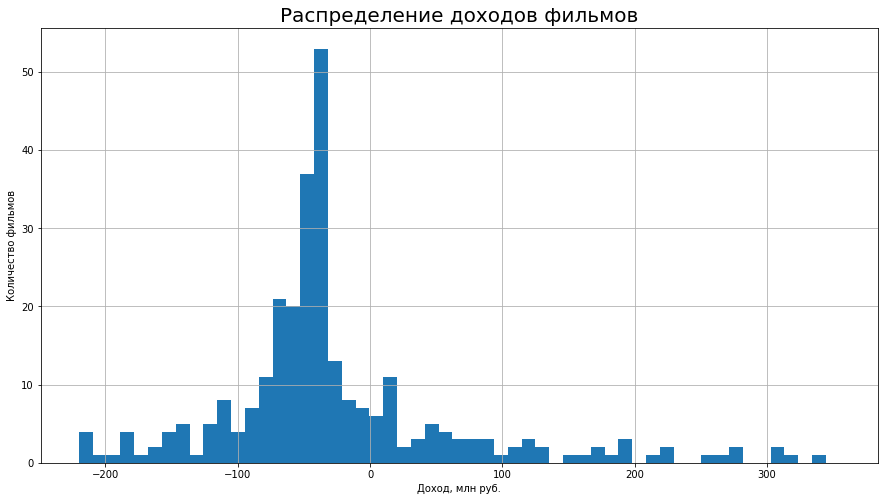

In [ ]:
#Посмотрим распределение значений диапазона 5-95%
data_support.income_mln.hist(bins=55, figsize=(15, 8), range=(-220, 355))

plt.title('Распределение доходов фильмов', fontsize=20)
plt.xlabel('Доход, млн руб.')
plt.ylabel('Количество фильмов')

plt.show()

Действительно, до выхода на окупаемость не хватает примерно 40 млн руб.

In [ ]:
data_support_per_income = data_support.pivot_table(index='show_start_year', values='income_mln', fill_value=0, aggfunc=['sum', 'mean', 'median'])
data_support_per_income.columns = ['_'.join(col).rstrip('_') for col in data_support_per_income.columns.values]

data_support_per_income

,sum_income_mln,mean_income_mln,median_income_mln
show_start_year,,,
2013,-235.10,-117.550000,-117.550
2014,-262.08,-16.380000,-38.120
2015,-1482.43,-17.440353,-38.110
2016,-941.86,-16.238966,-52.000
2017,4061.29,106.876053,-33.110
2018,3282.38,58.613929,-37.180
2019,-2645.41,-44.090167,-45.905


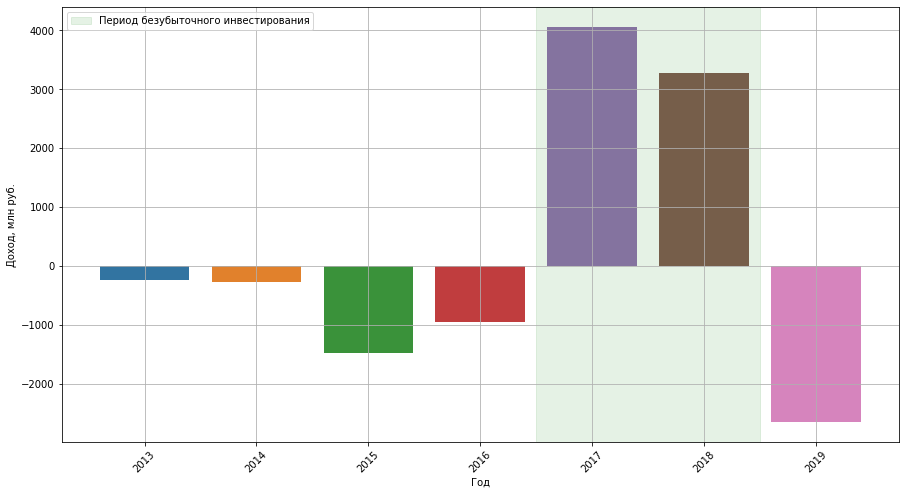

In [ ]:
plt.subplots(figsize=(15, 8))


sns.barplot(x=data_support_per_income.index, y=data_support_per_income['sum_income_mln'])



plt.grid(True)
plt.xticks(rotation=45)
plt.axvspan(3.5, 5.5, color='green', label='Период безубыточного инвестирования', alpha=0.1)


plt.xlabel('Год')
plt.ylabel('Доход, млн руб.')
plt.legend(loc='best')
plt.show()


Государственная поддержка чаще не спасает картины от провалов в прокате.  

Зато 2017 г. в лидерах по доходу. Вспомнив, что поддержка в этом году была минимальной, можно сделать вывод, что поддерживали по большей части качественные картины, за которые зритель голосовал рублем.

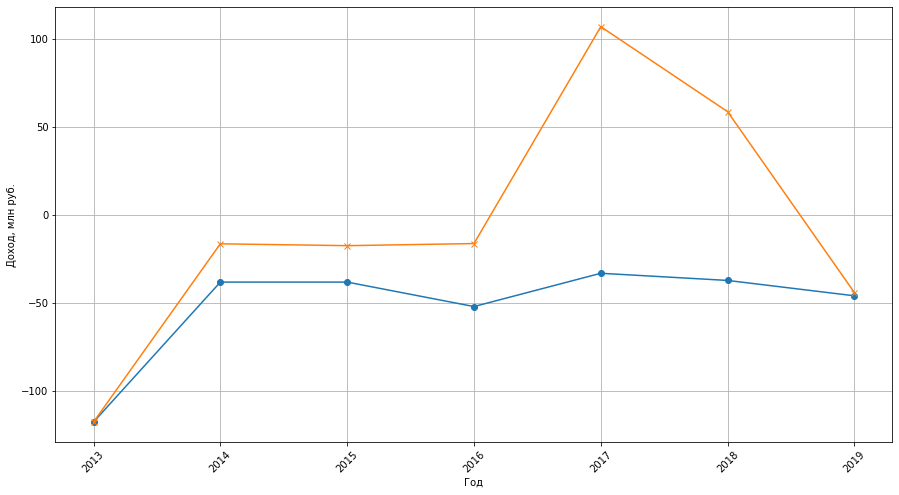

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(data_support_per_income.index, data_support_per_income['median_income_mln'], marker ='o')
ax.plot(data_support_per_income.index, data_support_per_income['mean_income_mln'], marker ='x')

#ax.bar(data_support_per_income.index, data_support_per_income['sum_income_mln'])


plt.grid(True)
plt.xticks(rotation=45)

plt.xlabel('Год')
plt.ylabel('Доход, млн руб.')
#plt.legend(loc='best')
plt.show()

Тем не менее медианные доход каждый год лежит ниже оси абсцисс (~ - 40 млн руб.). Средний (благодаря очень успешным фильмам) в 2017-2018 гг. находится в положительной полуплоскости.



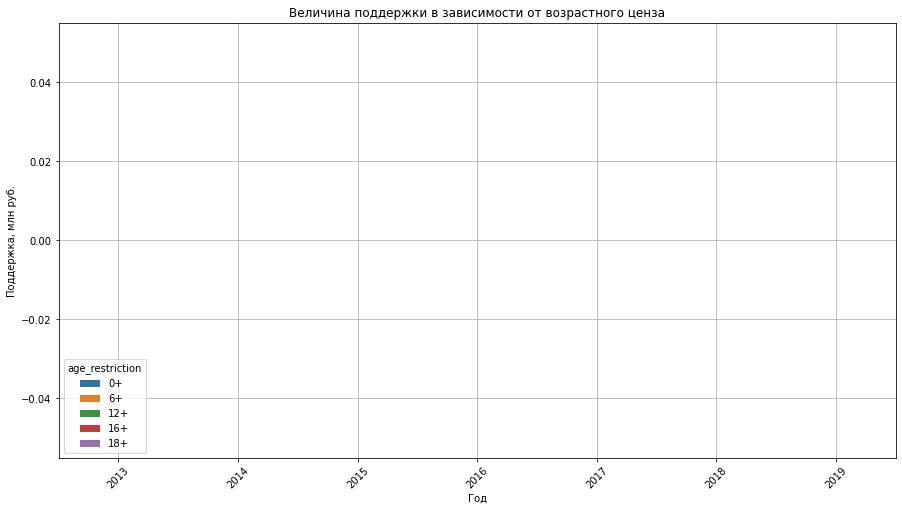

In [ ]:
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='show_start_year', y='full_support_mln', hue='age_restriction', data=data_support, ci=None,  hue_order=['0+', '6+', '12+', '16+', '18+'])

plt.grid(True)
ax.set(ylabel="Поддержка, млн руб.", xlabel="Год")
plt.title('Величина поддержки в зависимости от возрастного ценза')
plt.xticks(rotation=45)

plt.show()

По возраcтной категории большую поддержку получали ленты категории 6+ и 12+. Фильмы для малышей с 2018 г. практически лишились государственной поддержки. 

18+-категория - самая стабильная, практически каждый год имеет 20-40 млн руб.

In [ ]:
support_per_year  =  data_support.pivot_table(index='show_start_year', values=['refundable_support_mln', 'nonrefundable_support_mln', 'full_support_mln'], columns='type', aggfunc='sum', fill_value=0).reset_index()
#support_per_year.columns = ['_'.join(col).rstrip('_') for col in support_per_year.columns.values]
support_per_year

show_start_year full_support_mln                                \
type                     Анимационный Документальный Художественный   
0               2013             0.00              0         134.35   
1               2014            70.00              0         502.00   
2               2015           495.00              0        3161.24   
3               2016           350.00              0        3771.63   
4               2017           265.00              0        2881.62   
5               2018           658.97              0        2788.00   
6               2019           720.00              3        3681.00   

     nonrefundable_support_mln                                \
type              Анимационный Документальный Художественный   
0                         0.00              0         134.35   
1                        40.00              0         461.00   
2                       340.00              0        2679.09   
3                       255.00              0        3055.13   
4                       170.00              0        2264.62   
5                       403.97              0        2381.00   
6                       420.00              3        3153.00   

     refundable_support_mln                                
type           Анимационный Документальный Художественный  
0                         0              0           0.00  
1                        30              0          41.00  
2                       155              0         482.15  
3                        95              0         716.50  
4                        95              0         617.00  
5                       255              0         407.00  
6                       300              0         528.00

Как видно, поддержка касается в основном художественных фильмов, в меньшей мере анимации. Документальное кино начали поддерживать лишь в 2019 г.

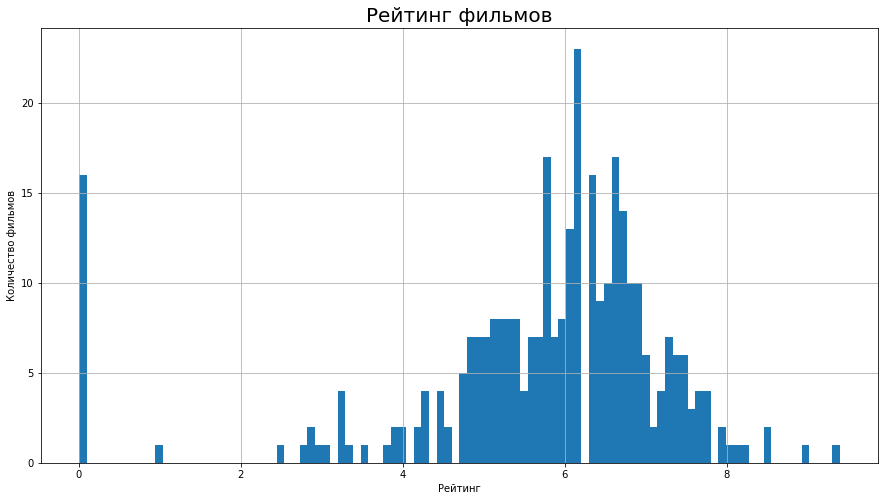

In [ ]:
data_support['ratings'].hist(bins=100, figsize=(15, 8))

plt.title('Рейтинг фильмов', fontsize=20)
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')

plt.show()

В основном фильмы получают рейтинг от 5 до 7, но есть как неудачники с рейтингом меньше 1, так и великолепно принятые критиками и зрителями картины с оценкой около 9. Велико число фильмов без рейтинга.

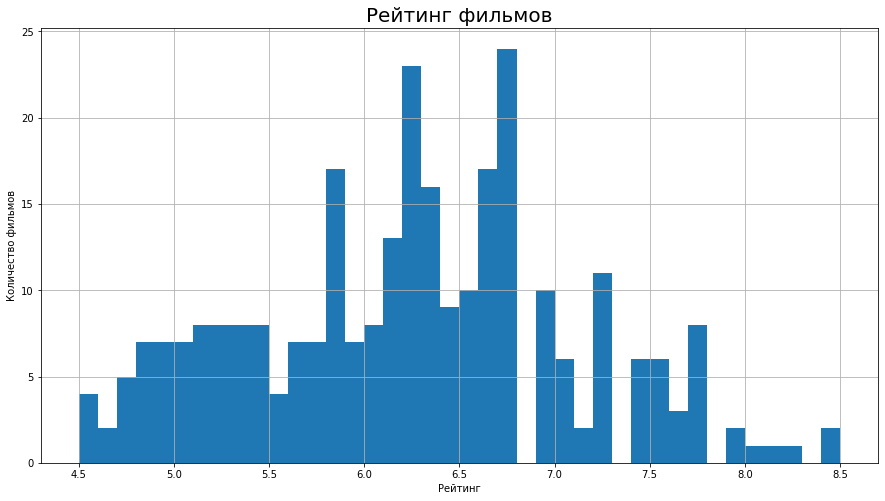

In [ ]:
data_support['ratings'].hist(bins=40, figsize=(15, 8), range=(4.5, 8.5))

plt.title('Рейтинг фильмов', fontsize=20)
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')

plt.show()

In [ ]:
data_support.query('(ratings < 3) | (ratings > 8)').sort_values(by='ratings', ascending=False)

,title,pu_number,show_start_year,type,film_studio,production_country,main_director,main_producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,main_genre,box_office_mln,support_ratio,full_support_mln,income_mln
2146,главный,111003415,2015,Художественный,киностудия мастер,россия,ю.кара,ю.кара,«6+» - для детей старше 6 лет,0.0,10.00,40.00,Министерство культуры,9.4,фантастика,0.33,0.250000,10.00,-39.67
3139,я умею вязать,111019615,2015,Художественный,белое зеркало,россия,н.п.у.с.иванова,с.кикнавелидзе,«16+» - для детей старше 16 лет,0.0,4.70,14.46,Министерство культуры,9.0,драма,0.80,0.325035,4.70,-13.66
1870,а зори здесь тихие...,111002915,2015,Художественный,компания реал-дакота,россия,р.давлетьяров,неизвестен,«12+» - для детей старше 12 лет,50.0,100.00,220.59,Фонд кино,8.5,драма,249.17,0.679995,150.00,28.58
3627,большой,111017416,2016,Художественный,зао продюсерская компания валерия тодоровского,россия,в.тодоровский,в.тодоровский,«12+» - для детей старше 12 лет,10.0,200.00,320.00,Фонд кино,8.5,криминал,228.58,0.656250,210.00,-91.42
6855,миллиард,111006719,2019,Художественный,медиа юниверсал ивент,россия,р.прыгунов,в.маслов,«12+» - для детей старше 12 лет,0.0,140.00,240.04,Фонд кино,8.2,драма,408.65,0.583236,140.00,168.61
1281,пока еще жива,111005313,2013,Художественный,ано содействия развитию кинематографии ангел-ф...,россия,а.атанесян,а.атанесян,«16+» - для детей старше 16 лет,0.0,26.50,79.41,Министерство культуры,8.1,драма,0.37,0.333711,26.50,-79.04
3709,спасти пушкина,111002517,2017,Художественный,каро продакшн,россия,ф.п.у.п.мирзоева,ю.обухов,«6+» - для детей старше 6 лет,0.0,40.00,65.00,Министерство культуры,2.9,комедия,5.73,0.615385,40.00,-59.27
3321,крым,111002017,2017,Художественный,пиманов и партнеры,россия,а.пиманов,а.пиманов,«16+» - для детей старше 16 лет,20.0,30.12,222.51,Фонд кино,2.9,драма,342.90,0.225248,50.12,120.39
3018,богатырша,114003715,2015,Анимационный,продюсерский центр парадиз,россия,о.лопато,г.нерсисян,«6+» - для детей старше 6 лет,15.0,15.00,62.04,Фонд кино,2.8,мультфильм,38.33,0.483559,30.00,-23.71
6313,крымский мост. сделано с любовью,111020018,2018,Художественный,студия 8 рядов,россия,т.кеосаян,д.кеосаян,«12+» - для детей старше 12 лет,0.0,100.00,154.25,Фонд кино,2.5,комедия,70.80,0.648298,100.00,-83.45


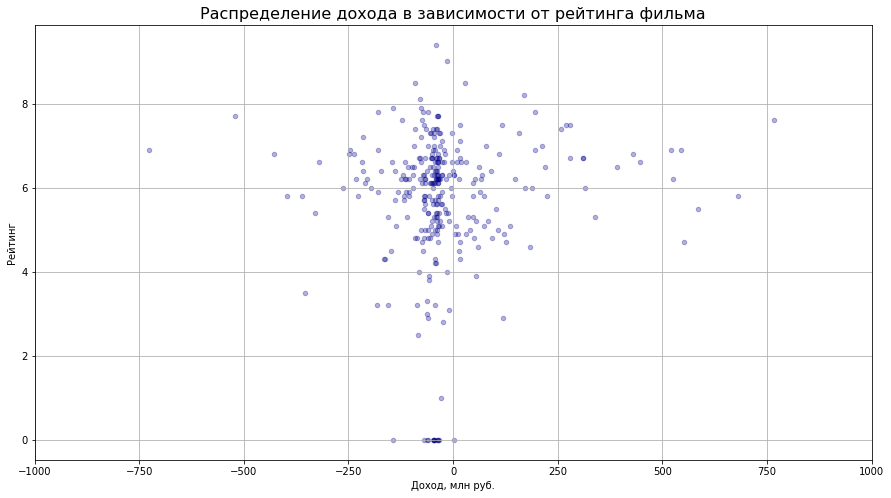

In [ ]:

data_support.plot.scatter(x='income_mln', y='ratings', figsize=(15, 8), alpha=.3, c='DarkBlue')

plt.grid(True)
plt.xlim(-1000, 1000)
plt.title('Распределение дохода в зависимости от рейтинга фильма', fontsize=16)
plt.xlabel('Доход, млн руб.')
plt.ylabel('Рейтинг')

plt.show()

Как ни странно, но зависимости дохода картины от рейтинга не видно. Медианные 40 млн руб. теряют и филмы с рейтингом 1, и c 9. Фильмы без рейтинга не окупаются в прокате - возможно, в этом и причина сокрытия данных.

In [ ]:
data_support.dropna()

,title,pu_number,show_start_year,type,film_studio,production_country,main_director,main_producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,main_genre,box_office_mln,support_ratio,full_support_mln,income_mln
7456,холоп,111021719,2019,Художественный,мем-медиа по заказу ао вбд груп,россия,к.шипенко,э.илоян,«12+» - для детей старше 12 лет,25.0,35.0,160.00,Фонд кино,6.8,комедия,3073.57,0.375000,60.0,2913.57
5653,движение вверх,111011817,2017,Художественный,студия тритэ никиты михалкова,россия,а.мегердичев,л.верещагин,«6+» - для детей старше 6 лет,0.0,400.0,590.19,Фонд кино,7.5,спорт,2779.69,0.677748,400.0,2189.50
6549,т-34,111024918,2018,Художественный,"кинокомпания марс-фильм по заказу мме, амедиа ...",россия,а.сидоров,а.златопольский,«12+» - для детей старше 12 лет,60.0,120.0,563.78,Фонд кино,6.5,драма,2271.75,0.319273,180.0,1707.97
5505,последний богатырь,111007017,2017,Художественный,киностудия слово по заказу уолт дисней компани...,россия,д.дьяченко,э.илоян,«12+» - для детей старше 12 лет,50.0,50.0,352.48,Фонд кино,6.8,комедия,1655.04,0.283704,100.0,1302.56
5708,лед,111000518,2018,Художественный,"водород 2011, арт пикчерс студия, государствен...",россия,о.трофим,м.врубель,«12+» - для детей старше 12 лет,25.0,60.0,148.59,Фонд кино,0.0,неизвестен,1445.73,0.572044,85.0,1297.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,реверберация,111003515,2015,Художественный,артлайт,россия,к.сухарьков,а.новиков,«18+» - запрещено для детей,0.0,25.0,37.37,Министерство культуры,0.0,неизвестен,0.02,0.668986,25.0,-37.35
3504,день до,111010916,2016,Художественный,кинобюро по заказу среда и ко,россия,а.котт,а.цекало,«18+» - запрещено для детей,25.0,25.0,90.82,Фонд кино,4.8,драма,0.01,0.550540,50.0,-90.81
2803,битва с экстрасенсами,111011315,2015,Художественный,"киноданц, кинобайт",россия,и.кордзаия,е.мелентьев,«12+» - для детей старше 12 лет,0.0,25.9,59.56,"Министерство культуры, Фонд кино",5.4,фэнтези,0.01,0.434856,25.9,-59.55
2527,вдвоем на льдине,111011015,2015,Художественный,первое творческое объединение,россия,н.джорджадзе,п.поляков,«12+» - для детей старше 12 лет,0.0,26.5,37.94,Министерство культуры,6.6,мелодрама,0.00,0.698471,26.5,-37.94


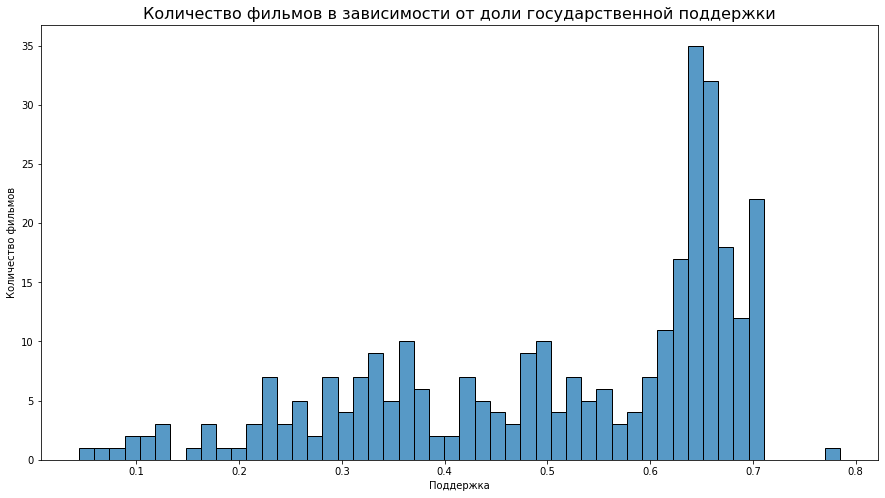

In [ ]:
plt.subplots(figsize=(15, 8))
sns.histplot(data=data_support.query('support_ratio < support_ratio.max()'), x="support_ratio", bins=50)

plt.title('Количество фильмов в зависимости от доли государственной поддержки', fontsize=16)
plt.xlabel('Поддержка')
plt.ylabel('Количество фильмов')

plt.show()

Высока доля картин, в которых государственаая поддержка составляет от 60 до 70 % бюджета.

In [ ]:
data_support['main_genre'].value_counts().head(10)

драма         92
комедия       74
мультфильм    30
неизвестен    16
триллер       15
мелодрама     15
фэнтези       10
ужасы         10
фантастика    10
военный        9
Name: main_genre, dtype: int64

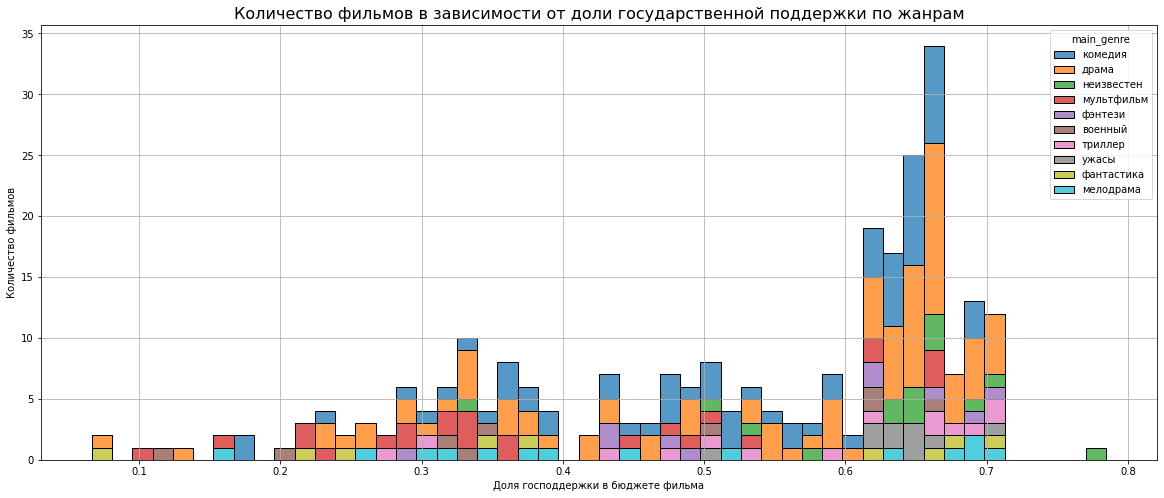

In [ ]:
plt.subplots(figsize=(20, 8))
sns.histplot(data=data_support.query("support_ratio < support_ratio.max() and main_genre.isin(['драма', 'комедия', 'мультфильм', 'неизвестен', 'мелодрама', 'триллер', 'ужасы', 'фантастика', 'фэнтези', 'военный'])"), x="support_ratio", hue='main_genre', multiple='stack', bins=50)

plt.grid(True)
plt.title('Количество фильмов в зависимости от доли государственной поддержки по жанрам', fontsize=16)
plt.xlabel('Доля господдержки в бюджете фильма')
plt.ylabel('Количество фильмов')

plt.show()

Высокий процент поддержки получали комедии и драмы

In [ ]:
directors_stat = data_support.pivot_table(index=['main_director'], values=['ratings', 'box_office_mln', 'income_mln', 'title', 'support_ratio'], aggfunc={'ratings': 'mean', 'box_office_mln': 'mean', 'income_mln': 'mean', 'title': 'count', 'support_ratio': 'mean'})

directors_stat = directors_stat.sort_values(ascending=False, by='income_mln').head(20).reset_index()

directors_stat

,main_director,box_office_mln,income_mln,ratings,support_ratio,title
0,а.мегердичев,2779.690000,2189.500000,7.500000,0.677748,1
1,а.сидоров,2271.750000,1707.970000,6.500000,0.319273,1
2,о.трофим,1445.730000,1297.140000,0.000000,0.572044,1
3,к.шипенко,1275.923333,1040.946667,6.833333,0.452686,3
4,ф.бондарчук,1038.320000,1038.320000,5.600000,inf,1
5,н.лебедев,1402.260000,766.980000,7.600000,0.695914,1
6,к.феоктистов,759.230000,584.770000,5.500000,0.286599,1
7,а.першин,683.030000,552.410000,4.700000,0.482315,1
8,а.черномазов,633.460000,545.810000,6.900000,0.342270,1
9,д.козловский,820.530000,430.340000,6.800000,0.666342,1


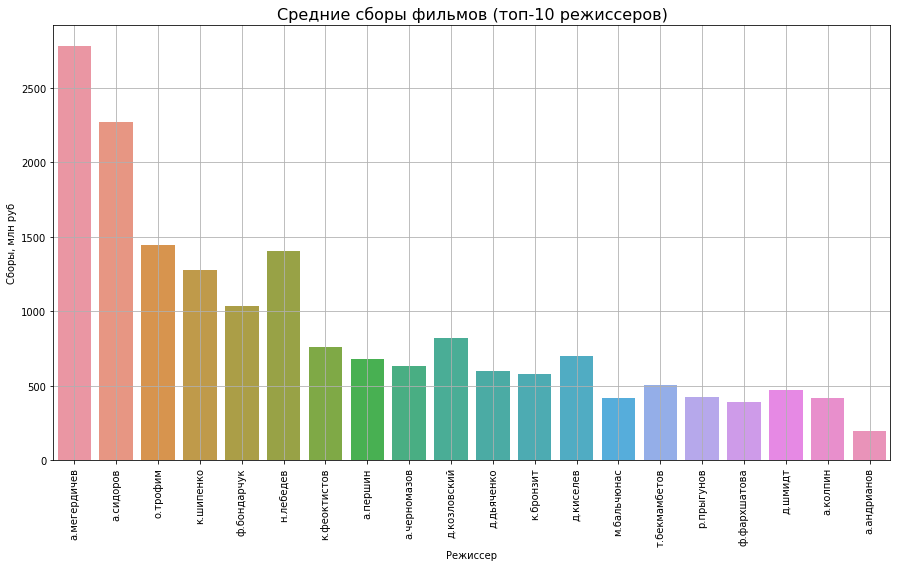

In [ ]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=directors_stat, x="main_director", y='box_office_mln')

plt.grid(True)
plt.title('Средние сборы фильмов (топ-10 режиссеров)', fontsize=16)
plt.xlabel('Режиссер')
plt.ylabel('Сборы, млн руб')
plt.xticks(rotation=90)


plt.show()

Практически каждый второй режиссер, фильм которого не только окупился, но и неплохо заработал, снял один-единственный фильм. "Новичкам всегде везет" в действии? :)

<AxesSubplot:>

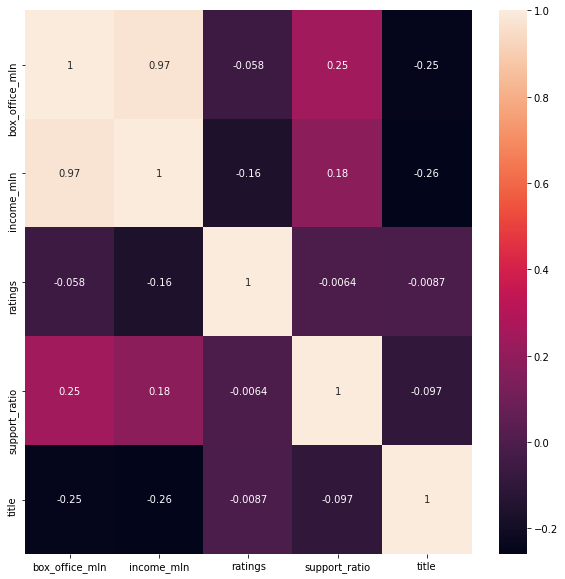

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(directors_stat.corr(), annot=True)

Действительно, сильная корреляция видна лишь между сборами и доходом

In [ ]:
film_stat = data_support.sort_values(ascending=False, by='ratings').head(20).reset_index()

film_stat

,index,title,pu_number,show_start_year,type,film_studio,production_country,main_director,main_producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,main_genre,box_office_mln,support_ratio,full_support_mln,income_mln
0,2146,главный,111003415,2015,Художественный,киностудия мастер,россия,ю.кара,ю.кара,«6+» - для детей старше 6 лет,0.0,10.0,40.00,Министерство культуры,9.4,фантастика,0.33,0.250000,10.0,-39.67
1,3139,я умею вязать,111019615,2015,Художественный,белое зеркало,россия,н.п.у.с.иванова,с.кикнавелидзе,«16+» - для детей старше 16 лет,0.0,4.7,14.46,Министерство культуры,9.0,драма,0.80,0.325035,4.7,-13.66
2,3627,большой,111017416,2016,Художественный,зао продюсерская компания валерия тодоровского,россия,в.тодоровский,в.тодоровский,«12+» - для детей старше 12 лет,10.0,200.0,320.00,Фонд кино,8.5,криминал,228.58,0.656250,210.0,-91.42
3,1870,а зори здесь тихие...,111002915,2015,Художественный,компания реал-дакота,россия,р.давлетьяров,неизвестен,«12+» - для детей старше 12 лет,50.0,100.0,220.59,Фонд кино,8.5,драма,249.17,0.679995,150.0,28.58
4,6855,миллиард,111006719,2019,Художественный,медиа юниверсал ивент,россия,р.прыгунов,в.маслов,«12+» - для детей старше 12 лет,0.0,140.0,240.04,Фонд кино,8.2,драма,408.65,0.583236,140.0,168.61
5,1281,пока еще жива,111005313,2013,Художественный,ано содействия развитию кинематографии ангел-ф...,россия,а.атанесян,а.атанесян,«16+» - для детей старше 16 лет,0.0,26.5,79.41,Министерство культуры,8.1,драма,0.37,0.333711,26.5,-79.04
6,7180,байкал - сердце мира 3d,112004619,2019,Документальный,продюсерский центр новое время,россия,а.попова,и.добровольский,«0+» - для любой зрительской аудитории,0.0,3.0,33.00,Министерство культуры,8.0,семейный,NaN,0.090909,3.0,NaN
7,7254,герой,111015819,2019,Художественный,карго,россия,к.оганисян,к.оганисян,«12+» - для детей старше 12 лет,20.0,100.0,250.00,Фонд кино,7.9,фэнтези,172.87,0.480000,120.0,-77.13
8,2482,однажды.,111004215,2015,Художественный,"компания реал-дакота, нп интерфест",россия,р.давлетьяров,р.давлетьяров,«16+» - для детей старше 16 лет,0.0,97.0,156.36,Фонд кино,7.9,драма,12.75,0.620363,97.0,-143.61
9,7322,успех,111018519,2019,Художественный,кинодом,россия,п.руминов,с.бобза,«12+» - для детей старше 12 лет,5.0,20.0,75.00,Фонд кино,7.8,драма,3.18,0.333333,25.0,-71.82


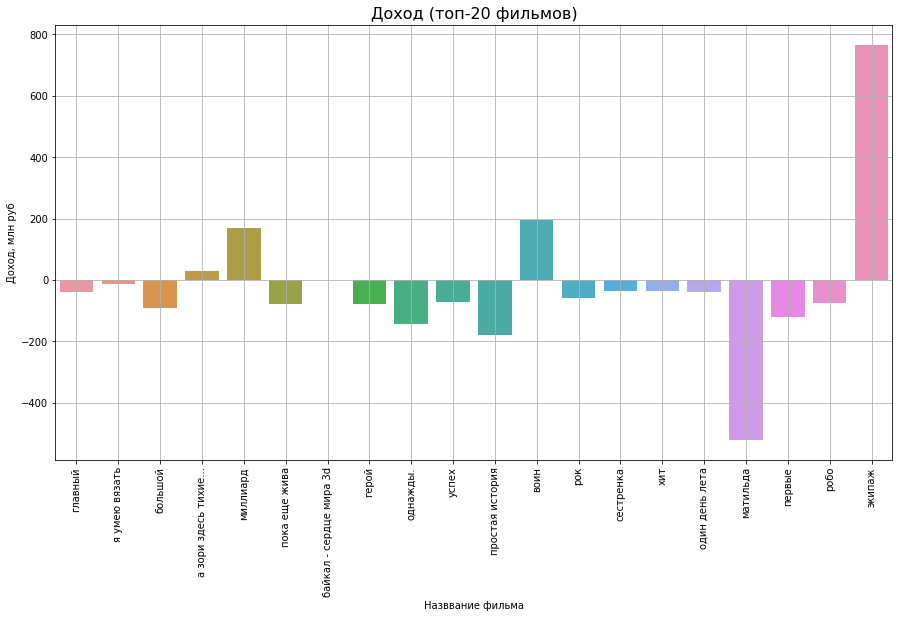

In [ ]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=film_stat, x="title", y='income_mln')

plt.grid(True)
plt.title('Доход (топ-20 фильмов)', fontsize=16)
plt.xlabel('Назввание фильма')
plt.ylabel('Доход, млн руб')
plt.xticks(rotation=90)


plt.show()

И всего три самых рейтинговых фильма принесли прибыль...

<AxesSubplot:>

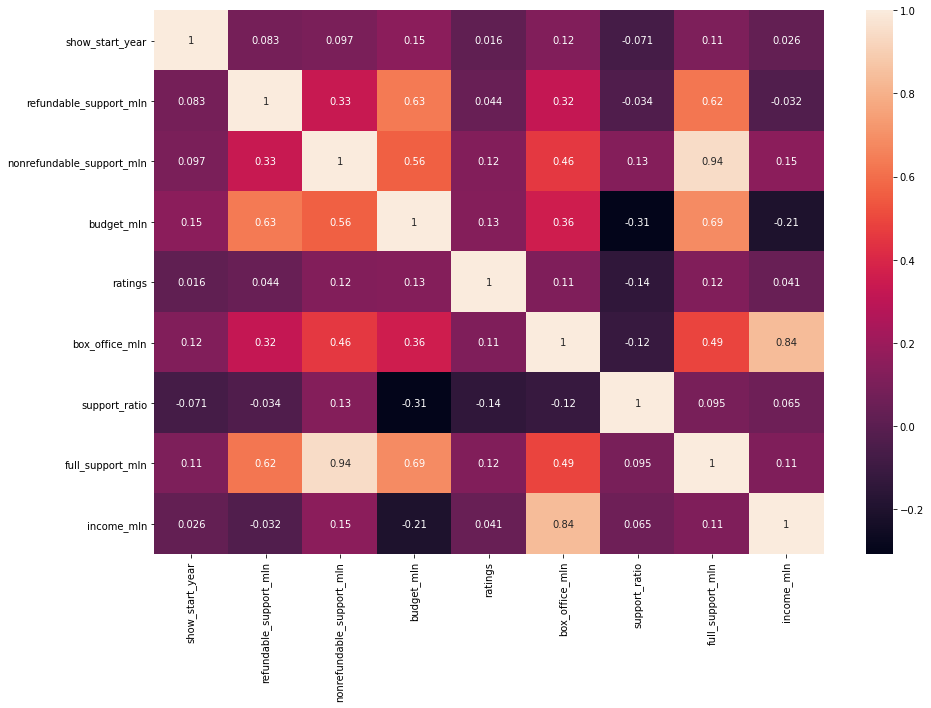

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_support[['show_start_year', 'type', 'film_studio',
       'production_country', 'main_director', 'main_producer',
       'age_restriction', 'refundable_support_mln',
       'nonrefundable_support_mln', 'budget_mln', 'financing_source',
       'ratings', 'main_genre', 'box_office_mln', 'support_ratio',
       'full_support_mln', 'income_mln']].corr(), annot=True)

# Вывод

Проведен анализ рынка российского кинопроката. Входящие данные объединены в один датафрейм на основании номера прокатного удостоверения.

#### Проведена обработка данных:

- проверены дублированные позиции;

- унифицированы и приведены к единообразному виду:

    *  назвния фильмов, 
    * тип фильма, 
    * страны производства,
    * фамилии режиссеров и продюсеров;
    * возрастной категории,
    * рейтинга;

- заполнены пропуски:
    * не указанные персоналии заменены на "неизвестен",
    * не указанная поддержка заменена на нули,
    * не указанные рейтинги заменены на медианные по типу фильма,
    * не указанные жанры заменены на "неизвестен";

- финансовые показатели приведены к миллионам руб. для удобства чтения.

Добавлены столбцы с данными о главном режиссере, жанре, суммарной государственной поддержке и ее проценте в бюджете фильма.

По итогам обработки объем данных уменьшился на 12 %.

#### Проведен исследовательский анализ данных.

Исследована динамика по количеству картин. За рассматриваемый период количество фильмов ежегодно растет, за исключением 2017 г. Также с годами растет и раскрываемость финансовых показателей картин.

В связи с этим прокатные сборы фильмов растут и в последние четыре рассмартиваемых года держаться в районе 45 мрлд руб.

По возратстной категории максималыне сборы у категории 16+ (вероятно, по причине популярных фильмов-франшиз, например, Марвел, Пираты etc.).

По типу фильма целесообразно рассматривать художественные и анимационные фильмы. Остальные категории заметно менее представлены в российском прокате.

#### Исследованы фильмы, получившее государственную поддержку.

Российский кинематограф не научился окупать себя. Большинство фильмов не окупаются; медианный убыток составляет 40 млн руб. 

Лишь в 2017 и 2018 г. суммарные сборы превысили расходы на производство. 

Поддержку чаще всего имеют картины с возрастным цензом 6+ и 12+. Документальное кино поддерживается лишь с 2019 г. Категория 16+, вероятно, не имеет большой поддержки из-за присутствия на рынке сильных конкурентов, работающих в этой нише. 

Средний рейтинг - 6. Рейтинг не оказывает заметного влияния на сборы и доход картин в прокате. 

Уровень поддержки составляет 60-70 % бюджета фильма чаще всего. Наиболее крупно поддерживаемые жанры - комедии и драмы.

### Рекомендации

При сборе данных:
- унифицировать написание названий фильмов (например название пробел часть), исключить дополнения (разнообразные "по мотивам..." и подобные);

- тип фильма давать на выбор из подготовленного списка (выпадающий список или подобное);

- унифицировать персоналии (Имя Фамилия либо Инициалы Фамилия);

- возрастную категорию ограничить числом;

- рейтинг обозначать в общепринятой манере (дробное число с одним знаком после запятой).




